# **DATA INSPECTION**

## Objectives

- To examine the structure and quality of the input dataset
- To identify missing values, outliers, and anomalies
- To understand data distributions and relationships

## Inputs

- Raw dataset(s)
- house_prices_records.csv
- inherited_houses.csv

## Outputs

* Data quality report including:
- 
- 
- 

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/P5-Heritage-Housing/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/P5-Heritage-Housing'

# HOUSE PRICES

## 1. Dataset Information Analysis

In [7]:
import numpy as np
import pandas as pd

house_prices_df = pd.read_csv(f"/workspace/P5-Heritage-Housing/outputs/datasets/collection/house_prices.csv")
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1422 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1315 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1225 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

- This explanation provides a comprehensive overview of the dataset's structure, missing values, and potential next steps for data preprocessing.

---

## 2. Data Description Summary

In [3]:
house_prices_df.describe()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
count,1460.000000,1374.000000,1361.000000,1460.000000,1460.000000,136.000000,1460.000000,1379.000000,1460.000000,1460.000000,1201.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,155.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,348.524017,2.869214,443.639726,567.240411,25.330882,472.980137,1978.506164,1515.463699,10516.828082,70.049958,103.685262,46.660274,5.575342,6.099315,1057.429452,103.741935,1971.267808,1984.865753,180921.195890
std,386.587738,438.865586,0.820115,456.098091,441.866955,66.684115,213.804841,24.689725,525.480383,9981.264932,24.284752,181.066207,66.256028,1.112799,1.382997,438.705324,135.543152,30.202904,20.645407,79442.502883
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,334.000000,1300.000000,21.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1872.000000,1950.000000,34900.000000
25%,882.000000,0.000000,2.000000,0.000000,223.000000,0.000000,334.500000,1961.000000,1129.500000,7553.500000,59.000000,0.000000,0.000000,5.000000,5.000000,795.750000,0.000000,1954.000000,1967.000000,129975.000000
50%,1087.000000,0.000000,3.000000,383.500000,477.500000,0.000000,480.000000,1980.000000,1464.000000,9478.500000,69.000000,0.000000,25.000000,5.000000,6.000000,991.500000,0.000000,1973.000000,1994.000000,163000.000000
75%,1391.250000,728.000000,3.000000,712.250000,808.000000,0.000000,576.000000,2002.000000,1776.750000,11601.500000,80.000000,166.000000,68.000000,6.000000,7.000000,1298.250000,182.500000,2000.000000,2004.000000,214000.000000
max,4692.000000,2065.000000,8.000000,5644.000000,2336.000000,286.000000,1418.000000,2010.000000,5642.000000,215245.000000,313.000000,1600.000000,547.000000,9.000000,10.000000,6110.000000,736.000000,2010.000000,2010.000000,755000.000000


- The "describe()" function provides a statistical summary of the numerical columns in the dataset.

In [4]:
house_prices_df.isnull().sum()

1stFlrSF            0
2ndFlrSF           86
BedroomAbvGr       99
BsmtExposure       38
BsmtFinSF1          0
BsmtFinType1      145
BsmtUnfSF           0
EnclosedPorch    1324
GarageArea          0
GarageFinish      235
GarageYrBlt        81
GrLivArea           0
KitchenQual         0
LotArea             0
LotFrontage       259
MasVnrArea          8
OpenPorchSF         0
OverallCond         0
OverallQual         0
TotalBsmtSF         0
WoodDeckSF       1305
YearBuilt           0
YearRemodAdd        0
SalePrice           0
dtype: int64

- Identifying columns that have values in the dataset

In [5]:
house_prices_df[house_prices_df.duplicated(subset=None)]

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice


- Checking if there are any repeating or duplicated rows.

## 3. Distribution

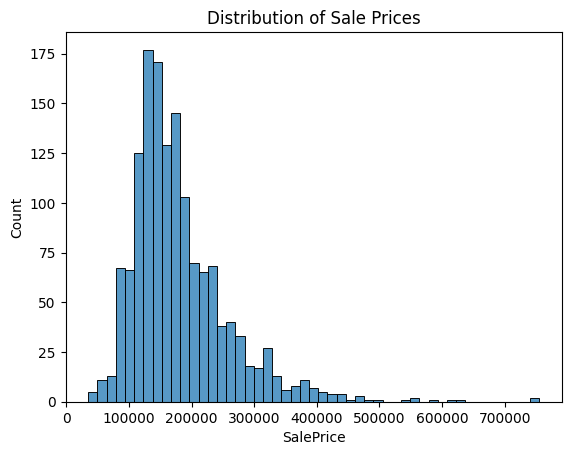

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=house_prices_df['SalePrice'])
plt.title('Distribution of Sale Prices')
plt.show()

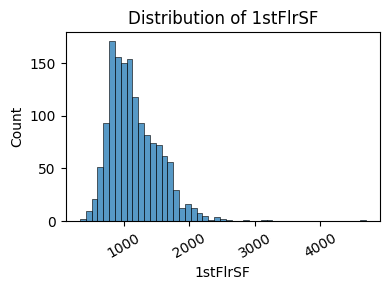

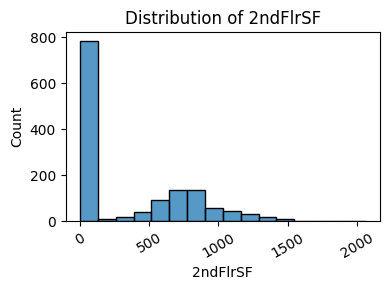

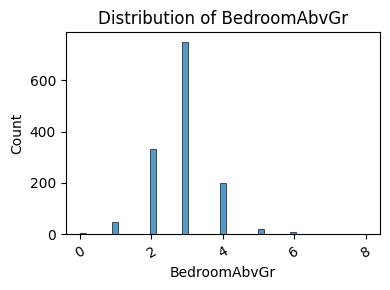

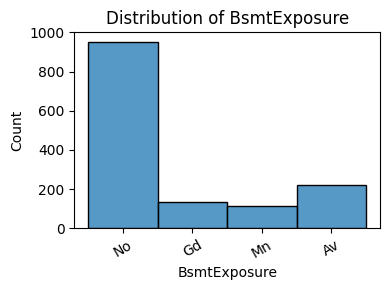

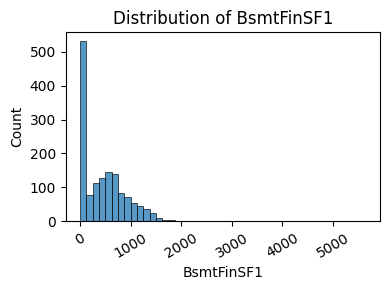

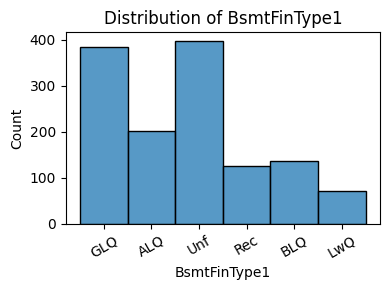

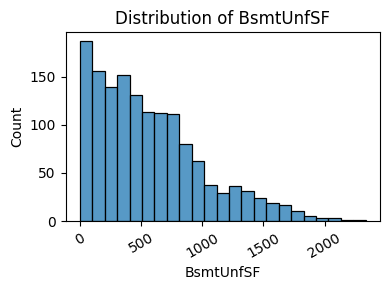

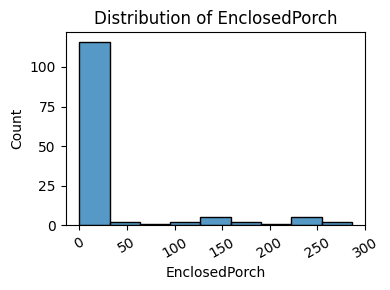

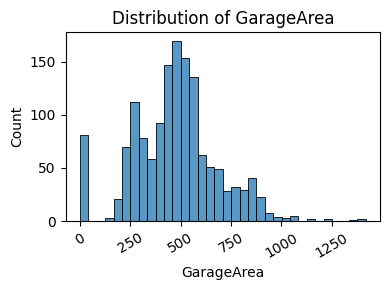

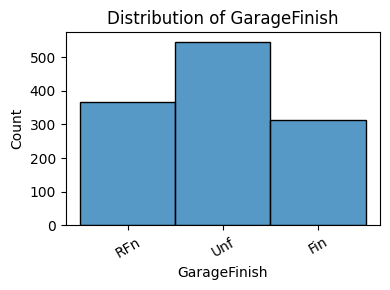

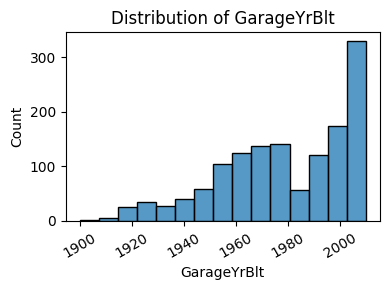

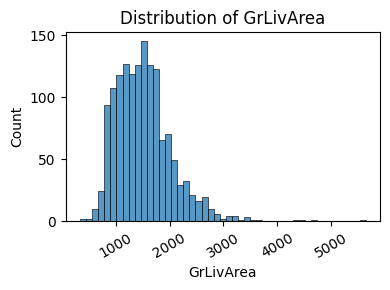

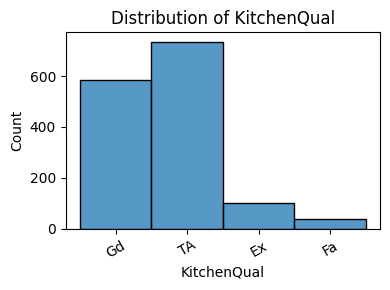

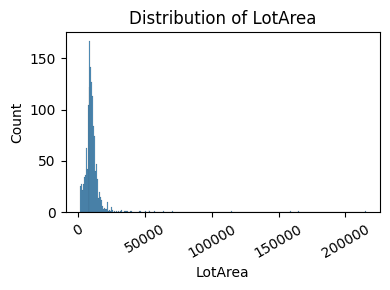

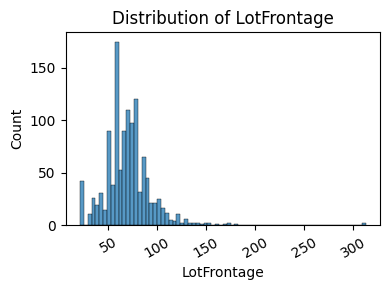

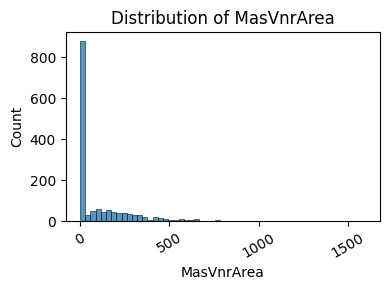

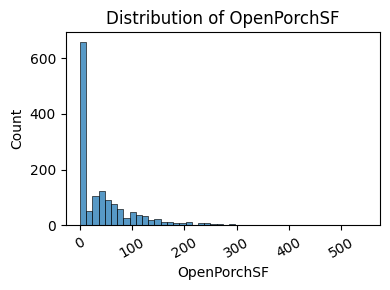

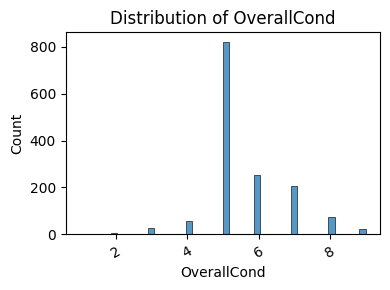

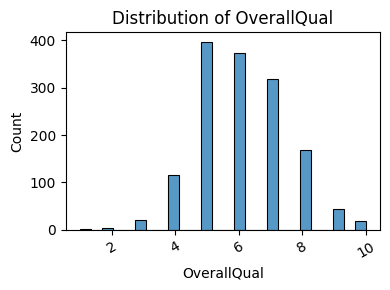

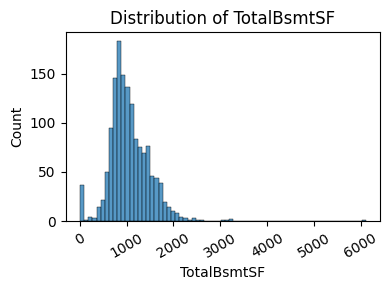

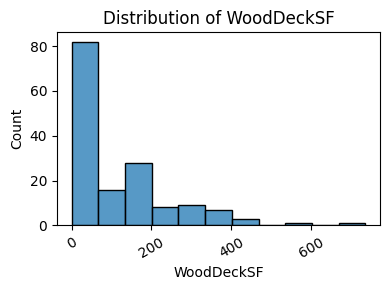

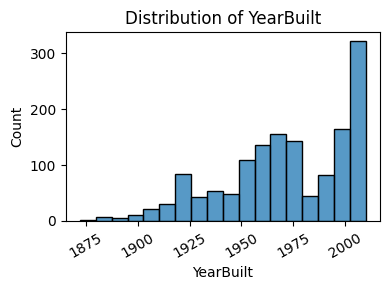

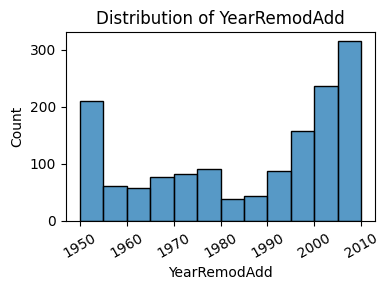

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

features_to_examine = house_prices_df
features_to_examine = features_to_examine.drop('SalePrice', axis=1)
for column in features_to_examine.columns:
    plt.figure(figsize=(4,3))
    sns.histplot(data=house_prices_df[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()
    

### Missing Data

In [54]:
def MissingRows(house_prices_df):
    missing_data = house_prices_df.isnull().sum()
    df_missing_data = (pd.DataFrame(
                            data={"Rows With Missing Data": missing_data,                                   
                                   "Data Type": house_prices_df.dtypes}
                                    )
                          )
    return df_missing_data

MissingRows(house_prices_df)

,Rows With Missing Data,Data Type
1stFlrSF,0,int64
2ndFlrSF,86,float64
BedroomAbvGr,99,float64
BsmtExposure,38,object
BsmtFinSF1,0,int64
BsmtFinType1,145,object
BsmtUnfSF,0,int64
EnclosedPorch,1324,float64
GarageArea,0,int64
GarageFinish,235,object


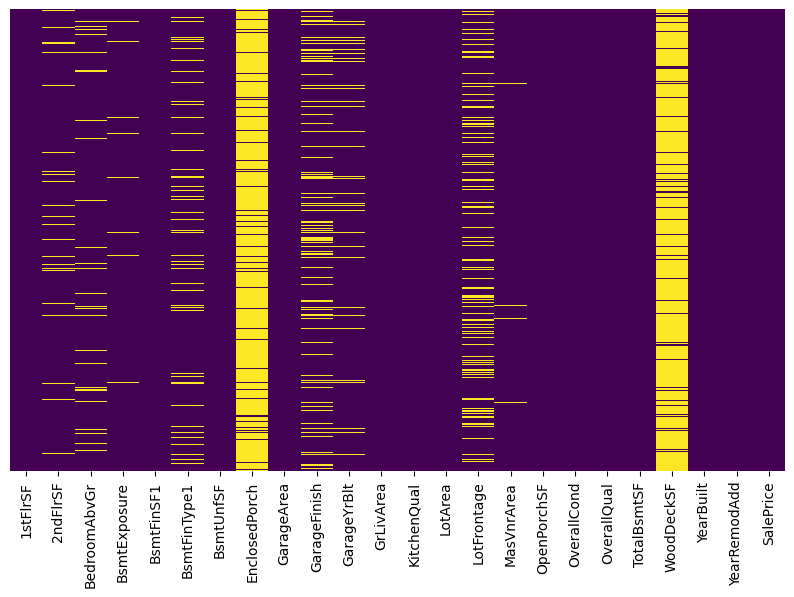

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(house_prices_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

- With this graph, density of missing information in the columns. can be seen. We will be removing these coloums in data cleaning process.

In [33]:
missing = house_prices_df.isnull().sum()
missing_percentage = (missing / len(house_prices_df)) * 100
print(missing_percentage)

1stFlrSF          0.000000
2ndFlrSF          5.890411
BedroomAbvGr      6.780822
BsmtExposure      2.602740
BsmtFinSF1        0.000000
BsmtFinType1      9.931507
BsmtUnfSF         0.000000
EnclosedPorch    90.684932
GarageArea        0.000000
GarageFinish     16.095890
GarageYrBlt       5.547945
GrLivArea         0.000000
KitchenQual       0.000000
LotArea           0.000000
LotFrontage      17.739726
MasVnrArea        0.547945
OpenPorchSF       0.000000
OverallCond       0.000000
OverallQual       0.000000
TotalBsmtSF       0.000000
WoodDeckSF       89.383562
YearBuilt         0.000000
YearRemodAdd      0.000000
SalePrice         0.000000
dtype: float64


- EnclosedPorch and WoodDeckSF columns' data have 90.68% and 89.38% missing data. 

In [34]:
house_prices_df.duplicated().value_counts()

False    1460
Name: count, dtype: int64

- There is not duplicated rows.

## OUTLIERS

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def find_outliers(house_prices_df):
    numerical_columns = house_prices_df.select_dtypes(include=['int64', 'float64']).columns
    df_numerical = house_prices_df.copy()

    for column in numerical_columns:        
        Q1 = house_prices_df[column].quantile(0.25)
        Q3 = house_prices_df[column].quantile(0.75)
        IQR = Q3 - Q1
        down = Q1 - 1.5 * IQR
        up = Q3 + 1.5 * IQR

        df_numerical.loc[(df_numerical[column] < down) | (df_numerical[column] > up), column] = np.nan
        outliers = df_numerical[column].isnull().sum()
        print(f"In {column}, there are {outliers} outliers.")

    return df_numerical

df_numerical = find_outliers(house_prices_df)    

In 1stFlrSF, there are 20 outliers.
In 2ndFlrSF, there are 88 outliers.
In BedroomAbvGr, there are 133 outliers.
In BsmtFinSF1, there are 7 outliers.
In BsmtUnfSF, there are 29 outliers.
In EnclosedPorch, there are 1344 outliers.
In GarageArea, there are 21 outliers.
In GarageYrBlt, there are 81 outliers.
In GrLivArea, there are 31 outliers.
In LotArea, there are 69 outliers.
In LotFrontage, there are 347 outliers.
In MasVnrArea, there are 104 outliers.
In OpenPorchSF, there are 77 outliers.
In OverallCond, there are 125 outliers.
In OverallQual, there are 2 outliers.
In TotalBsmtSF, there are 61 outliers.
In WoodDeckSF, there are 1308 outliers.
In YearBuilt, there are 7 outliers.
In YearRemodAdd, there are 0 outliers.
In SalePrice, there are 61 outliers.


## ADDITIONAL VISUALISATION

- OverallCond, OverallQual, YearBuilt and 1stFlrSF are chosen to show their effects on SalePrice.

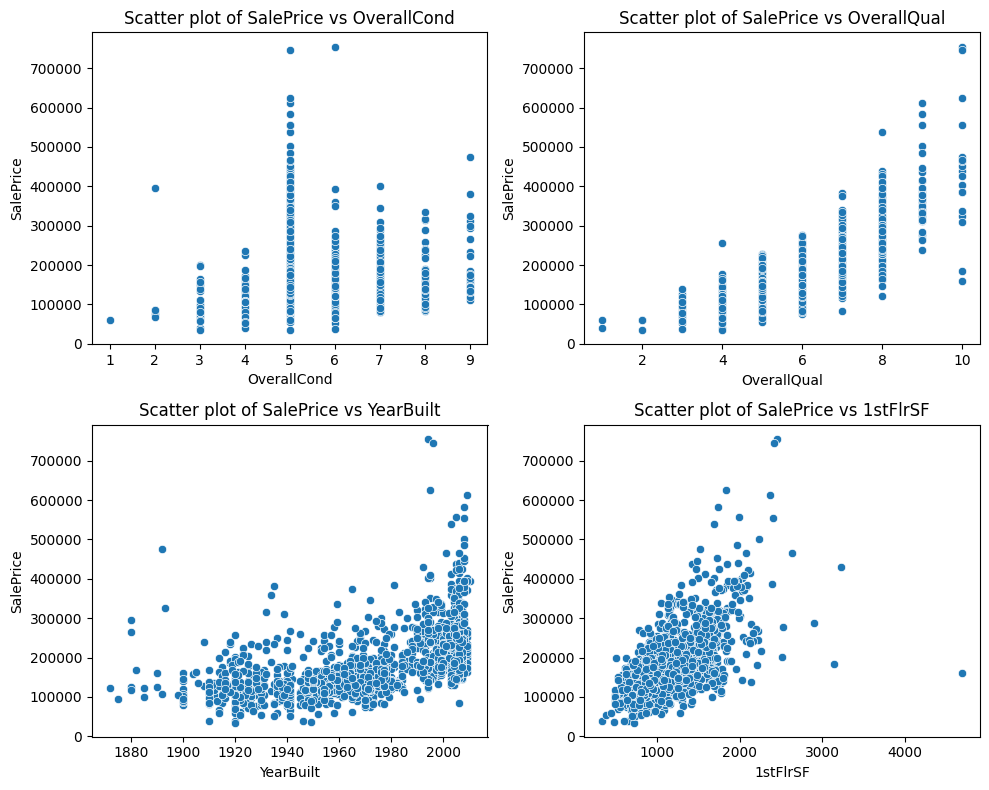

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

scatter_columns = ["OverallCond", "OverallQual", "YearBuilt", "1stFlrSF"]

plt.figure(figsize=(10, 8))

for i, column in enumerate(scatter_columns, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=column, y="SalePrice", data=house_prices_df)
    plt.title(f'Scatter plot of SalePrice vs {column}')

plt.tight_layout()
plt.show()

## FREQUENCY

In [61]:
def values_frequences(house_prices_df):
    for column in house_prices_df.columns:
        print(f"\n{'-'*50}")
        print(f"{column} column's values frequency:")
        print(house_prices_df[column].value_counts().sort_values(ascending=False))
        print(f"Unique values: {house_prices_df[column].nunique()}")

values_frequences(house_prices_df)


--------------------------------------------------
1stFlrSF column's values frequency:
1stFlrSF
864     25
1040    16
912     14
894     12
848     12
        ..
783      1
673      1
1241     1
693      1
1256     1
Name: count, Length: 753, dtype: int64
Unique values: 753

--------------------------------------------------
2ndFlrSF column's values frequency:
2ndFlrSF
0.0       781
728.0      10
672.0       8
504.0       8
600.0       7
         ... 
567.0       1
582.0       1
304.0       1
628.0       1
1152.0      1
Name: count, Length: 401, dtype: int64
Unique values: 401

--------------------------------------------------
BedroomAbvGr column's values frequency:
BedroomAbvGr
3.0    749
2.0    333
4.0    199
1.0     46
5.0     20
6.0      7
0.0      6
8.0      1
Name: count, dtype: int64
Unique values: 8

--------------------------------------------------
BsmtExposure column's values frequency:
BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64
Unique v

- YearRemodAdd values has discrepancy with this info. Houses have 178 of 1950 YearRemodAdd values. It needs to be minded. We won't be determining it.

[Text(0.5, 1.0, 'Histogram of date houses remodelled.')]

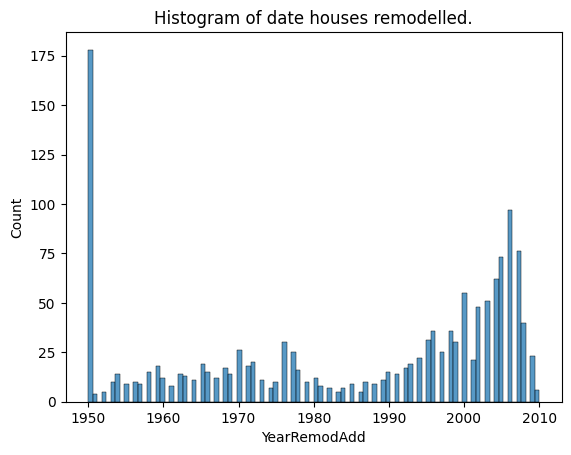

In [67]:
sns.histplot(x="YearRemodAdd", data=house_prices_df, bins=100).set(title='Histogram of date houses remodelled.')

## VALUES OF ZERO

- Here it is needed to check if the columns have appropriate values. For example, not every house needs to have a WoodDeck value or a 2nd floor, but every house needs to have a LotFrontage value. So if some columns are 0, they can be counted as not present.

In [56]:
(house_prices_df == 0).sum()

1stFlrSF           0
2ndFlrSF         781
BedroomAbvGr       6
BsmtExposure       0
BsmtFinSF1       467
BsmtFinType1       0
BsmtUnfSF        118
EnclosedPorch    116
GarageArea        81
GarageFinish       0
GarageYrBlt        0
GrLivArea          0
KitchenQual        0
LotArea            0
LotFrontage        0
MasVnrArea       861
OpenPorchSF      656
OverallCond        0
OverallQual        0
TotalBsmtSF       37
WoodDeckSF        78
YearBuilt          0
YearRemodAdd       0
SalePrice          0
dtype: int64

## Correlation

In [8]:
def Correlation(df, method, key=False, ascending=True):
    correlation = df.corr(method=method)['SalePrice'].sort_values(key=key, ascending=ascending)[1:]
    
    return correlation

In [9]:
ohe = house_prices_df.fillna('Missing', inplace=False)

In [10]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=ohe.columns[ohe.dtypes=='object'].to_list(), drop_last=False)
df_onehot = encoder.fit_transform(ohe)
df_onehot.head(5)

,1stFlrSF,BsmtFinSF1,BsmtUnfSF,GarageArea,GrLivArea,LotArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,...,WoodDeckSF_431.0,WoodDeckSF_162.0,WoodDeckSF_206.0,WoodDeckSF_84.0,WoodDeckSF_33.0,WoodDeckSF_356.0,WoodDeckSF_164.0,WoodDeckSF_24.0,WoodDeckSF_147.0,WoodDeckSF_736.0
0,856,706,150,548,1710,8450,61,5,7,856,...,0,0,0,0,0,0,0,0,0,0
1,1262,978,284,460,1262,9600,0,8,6,1262,...,0,0,0,0,0,0,0,0,0,0
2,920,486,434,608,1786,11250,42,5,7,920,...,0,0,0,0,0,0,0,0,0,0
3,961,216,540,642,1717,9550,35,5,7,756,...,0,0,0,0,0,0,0,0,0,0
4,1145,655,490,836,2198,14260,84,5,8,1145,...,0,0,0,0,0,0,0,0,0,0


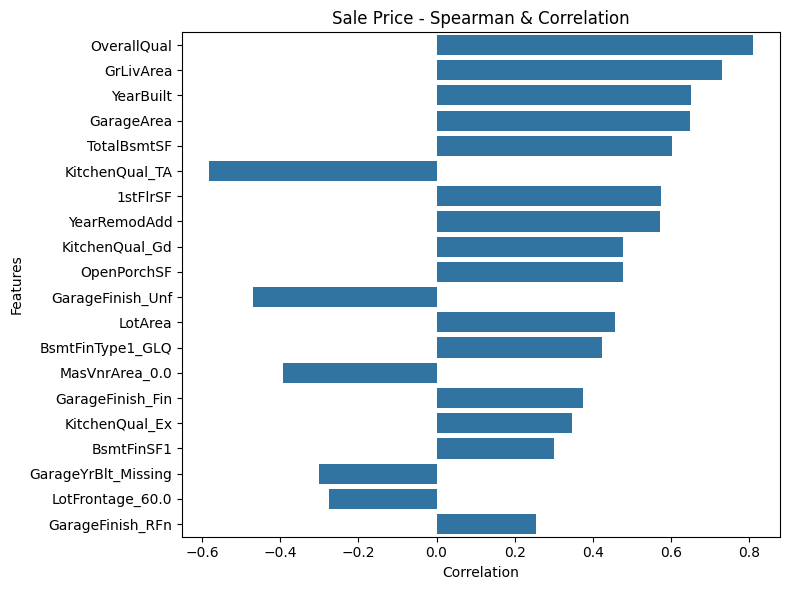

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
spearman = Correlation(df_onehot, 'spearman', key=abs, ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=spearman[:20].values, y=spearman[:20].index)
plt.title('Sale Price - Spearman & Correlation')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

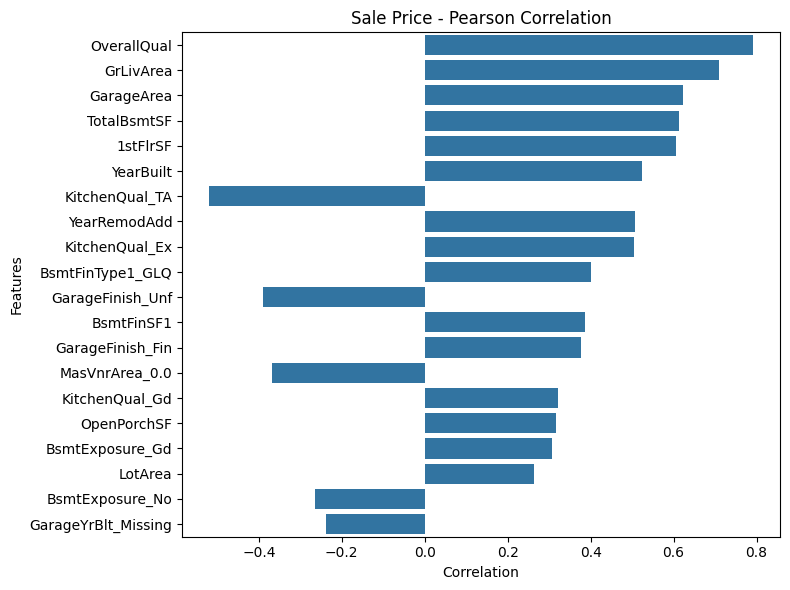

In [12]:
pearson = Correlation(df_onehot, 'pearson', key=abs,ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=pearson[:20].values, y=pearson[:20].index)
plt.title('Sale Price - Pearson Correlation')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


SalePrice has positive correlation with 
- OverallQual
- GrLivArea
- 1stFIrSF
- GarageArea
- TotalBsmtSF
- YearBuilt

SalePrice has negative correlation with
- KitchenQual_TA
- GarageFinish_Unf
- MasVnrArea_0.0
- GarageYrBlt_Missing
- GarageFinish_None

It is time to choose possitive correlated variables to study on.

In [1]:
study_variables = [     
    '1stFlrSF', 'GarageArea', 
    'GrLivArea', 'OverallQual', 
    'TotalBsmtSF', 'YearBuilt', 
]

In [11]:
df_study= df_onehot.filter(study_variables + ['SalePrice'])

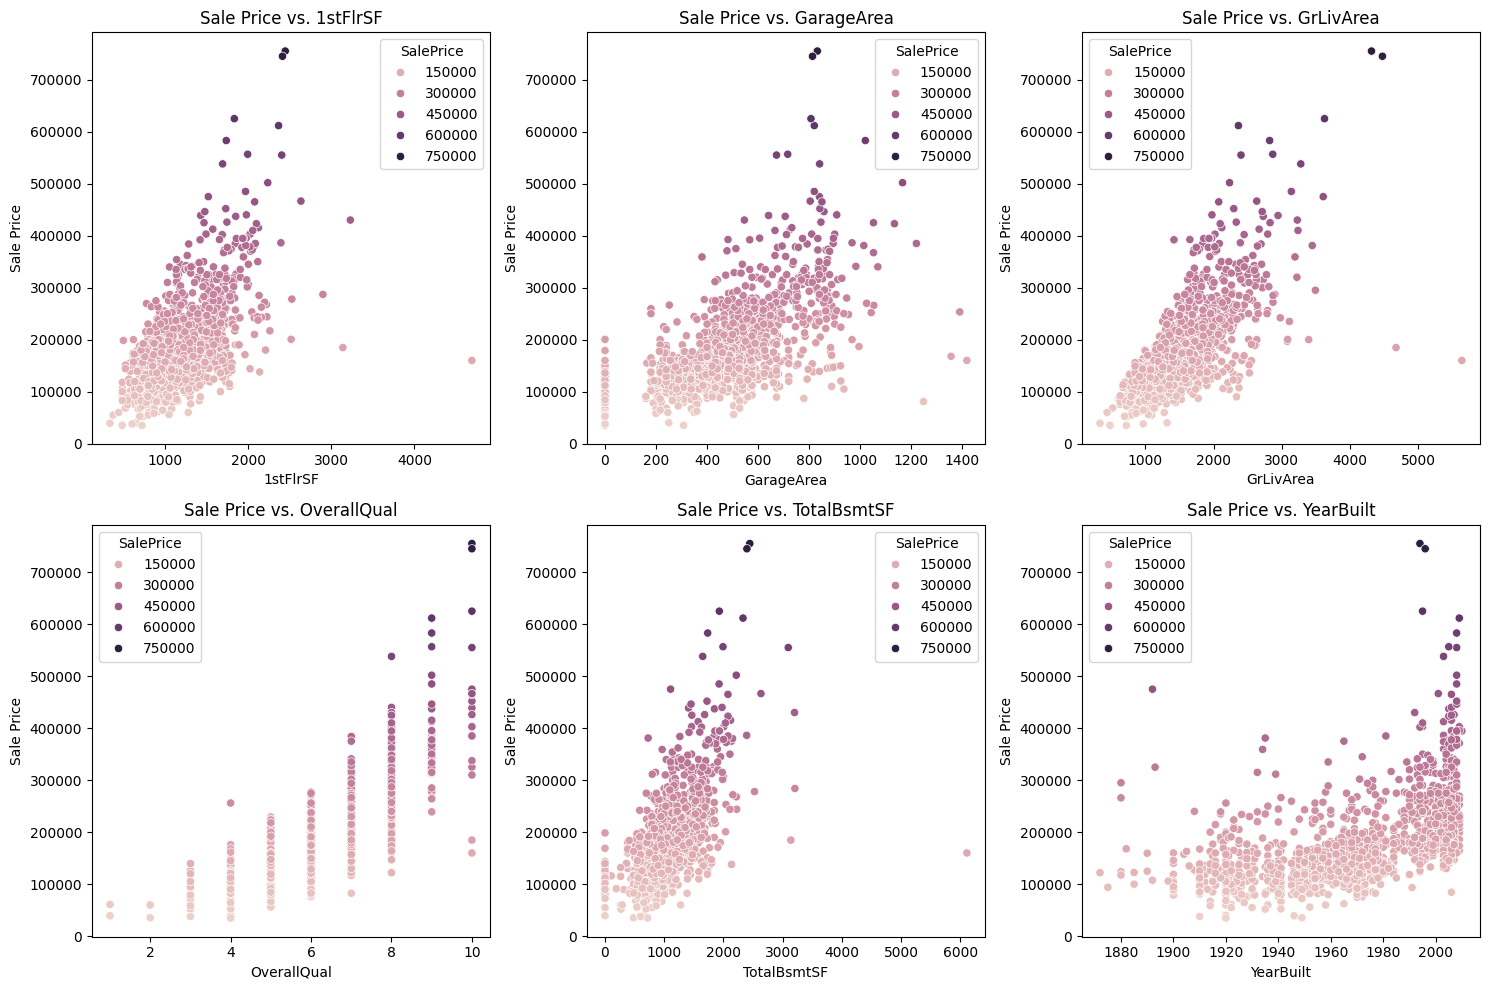

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

for i, attribute in enumerate(study_variables, 1):
    plt.subplot(2,3, i)
    sns.scatterplot(data=df_study, x=df_study[attribute], y=house_prices_df['SalePrice'], hue='SalePrice')
    plt.title(f'Sale Price vs. {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Sale Price')

plt.tight_layout()
plt.show()

# INHERITED HOUSES

## 1. Dataset Information Analysis

In [ ]:
inherited_houses_df = pd.read_csv(f"/workspace/P5-Heritage-Housing/outputs/datasets/collection/inherited_houses.csv")
inherited_houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       4 non-null      int64  
 1   2ndFlrSF       4 non-null      int64  
 2   BedroomAbvGr   4 non-null      int64  
 3   BsmtExposure   4 non-null      object 
 4   BsmtFinSF1     4 non-null      float64
 5   BsmtFinType1   4 non-null      object 
 6   BsmtUnfSF      4 non-null      float64
 7   EnclosedPorch  4 non-null      int64  
 8   GarageArea     4 non-null      float64
 9   GarageFinish   4 non-null      object 
 10  GarageYrBlt    4 non-null      float64
 11  GrLivArea      4 non-null      int64  
 12  KitchenQual    4 non-null      object 
 13  LotArea        4 non-null      int64  
 14  LotFrontage    4 non-null      float64
 15  MasVnrArea     4 non-null      float64
 16  OpenPorchSF    4 non-null      int64  
 17  OverallCond    4 non-null      int64  
 18  OverallQual   

# OBSERVATIONS, CONCLUSIONS AND NEXT STEPS